In [ ]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install tensorflow
!pip install scikit-learn
!pip install torch
!pip install torchvision
!pip install seaborn
!pip install numpy matplotlib seaborn scikit-learn



In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter
from sklearn.metrics import confusion_matrix

### 1. Loading the MNIST Dataset
The MNIST database is a large collection of handwritten digits used for training and testing in machine learning. It comprises 60,000 training examples and 10,000 test examples derived from a larger NIST database. These images originally written by U.S. Census Bureau employees and high school students were size-normalized to a 20x20 pixel box and centered in a 28x28 pixel image using anti-aliasing techniques to maintain their aspect ratio, resulting in images with grey levels.

Number of training images: 60000
Number of testing images: 10000
Image shape: (28, 28)


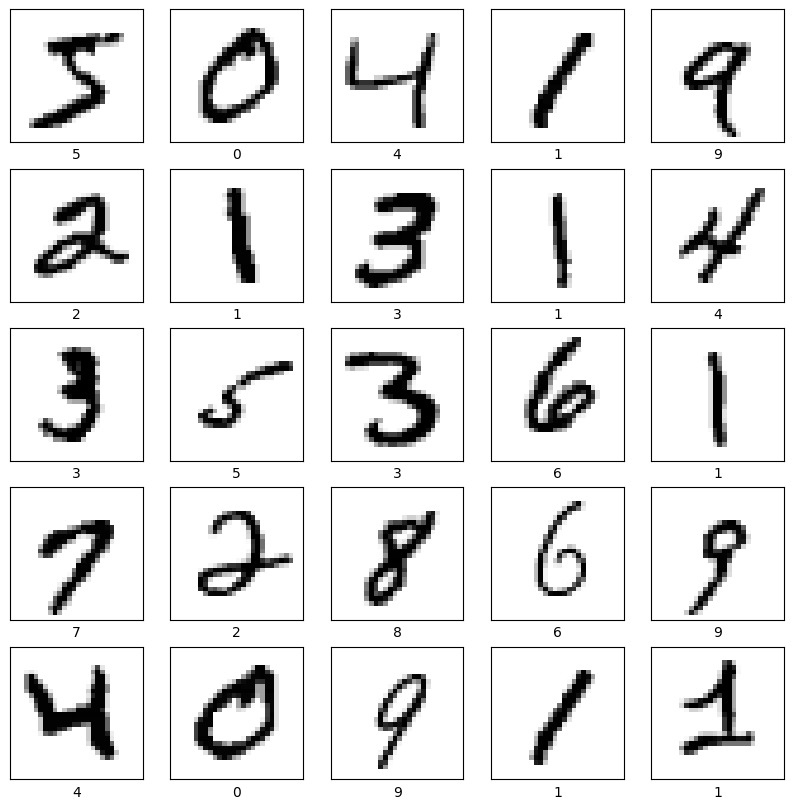

In [ ]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display basic statistics
print("Number of training images:", x_train.shape[0])
print("Number of testing images:", x_test.shape[0])
print("Image shape:", x_train[0].shape)

# Normalize the images to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Display a sample of training images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

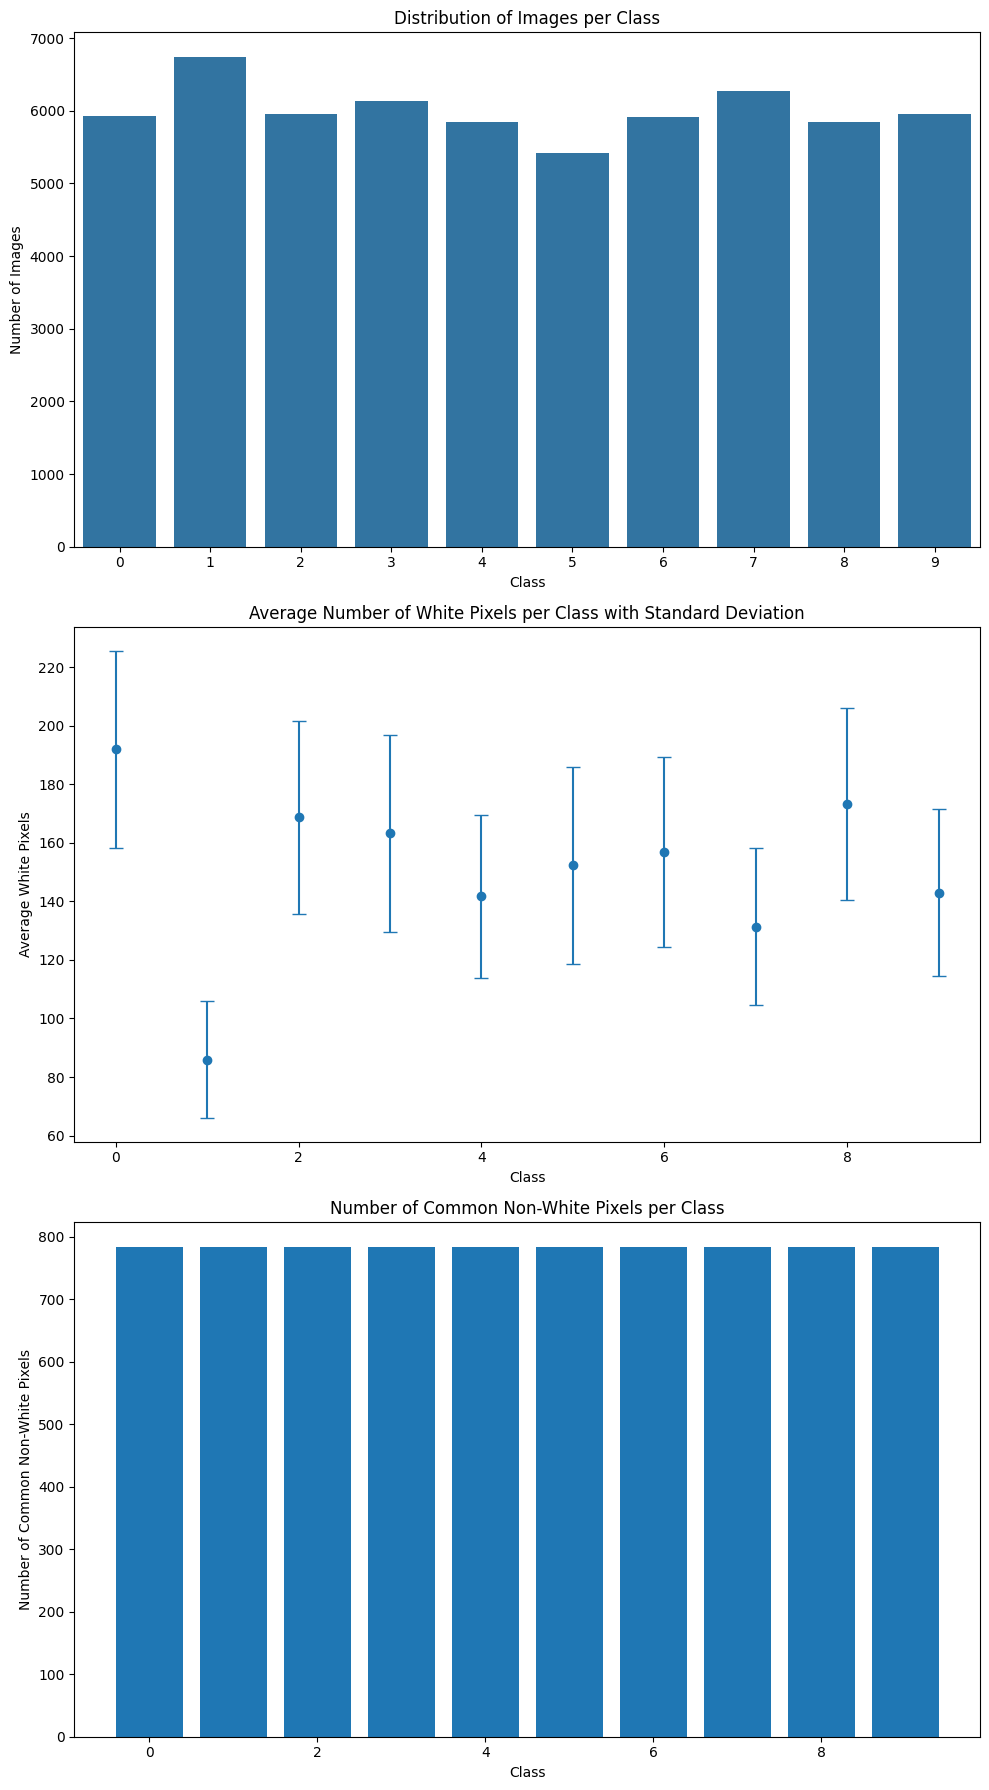

Class 0:
  Number of images: 5923
  Average number of white pixels: 191.97
  Standard deviation of white pixels: 33.71
  Common non-white pixels: 784
Class 1:
  Number of images: 6742
  Average number of white pixels: 85.85
  Standard deviation of white pixels: 19.97
  Common non-white pixels: 784
Class 2:
  Number of images: 5958
  Average number of white pixels: 168.81
  Standard deviation of white pixels: 32.94
  Common non-white pixels: 784
Class 3:
  Number of images: 6131
  Average number of white pixels: 163.34
  Standard deviation of white pixels: 33.65
  Common non-white pixels: 784
Class 4:
  Number of images: 5842
  Average number of white pixels: 141.81
  Standard deviation of white pixels: 27.81
  Common non-white pixels: 784
Class 5:
  Number of images: 5421
  Average number of white pixels: 152.33
  Standard deviation of white pixels: 33.58
  Common non-white pixels: 784
Class 6:
  Number of images: 5918
  Average number of white pixels: 156.93
  Standard deviation of wh

# Improvements and Suggestions
## Optimize Calculation of Common Pixels: The calculation of common pixels could be optimized to avoid potential bottlenecks.
## Clearer Visualization: Enhance the visualizations for better readability.
## Code Clarity and Efficiency: Improve the readability and efficiency of the code with better variable names and optimized calculations

Explanation of Improvements
Function Optimization:

The calculation of common non-white pixels is clarified and optimized for better readability and performance.
Clear and meaningful variable names enhance readability.
Visualization Enhancements:

Axis labels and titles are more descriptive.
Error bars for the average white pixels provide better clarity.
Detailed Statistics Printing:

Added formatting to ensure the printed statistics are more readable, especially for floating-point numbers.
These improvements make the code more efficient, readable, and user-friendly.

### 2.  simple statistics of this dataset
number of images, their distribution, average
number of white pixels in each class and its standard deviation, the number of common
pixels in each class that are non-white.

Epoch 1/20
938/938 [==============================] - 7s 7ms/step - loss: 0.3416 - accuracy: 0.9023 - val_loss: 0.1579 - val_accuracy: 0.9551
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1614 - accuracy: 0.9528 - val_loss: 0.1110 - val_accuracy: 0.9666
Epoch 3/20
938/938 [==============================] - 7s 8ms/step - loss: 0.1209 - accuracy: 0.9640 - val_loss: 0.0933 - val_accuracy: 0.9713
Epoch 4/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0979 - accuracy: 0.9701 - val_loss: 0.0844 - val_accuracy: 0.9740
Epoch 5/20
938/938 [==============================] - 8s 9ms/step - loss: 0.0843 - accuracy: 0.9738 - val_loss: 0.0782 - val_accuracy: 0.9752
Epoch 6/20
938/938 [==============================] - 8s 9ms/step - loss: 0.0736 - accuracy: 0.9773 - val_loss: 0.0699 - val_accuracy: 0.9792
Epoch 7/20
938/938 [==============================] - 11s 12ms/step - loss: 0.0642 - accuracy: 0.9798 - val_loss: 0.0771 - val_accuracy: 0.9761
Epoc

KeyboardInterrupt: 

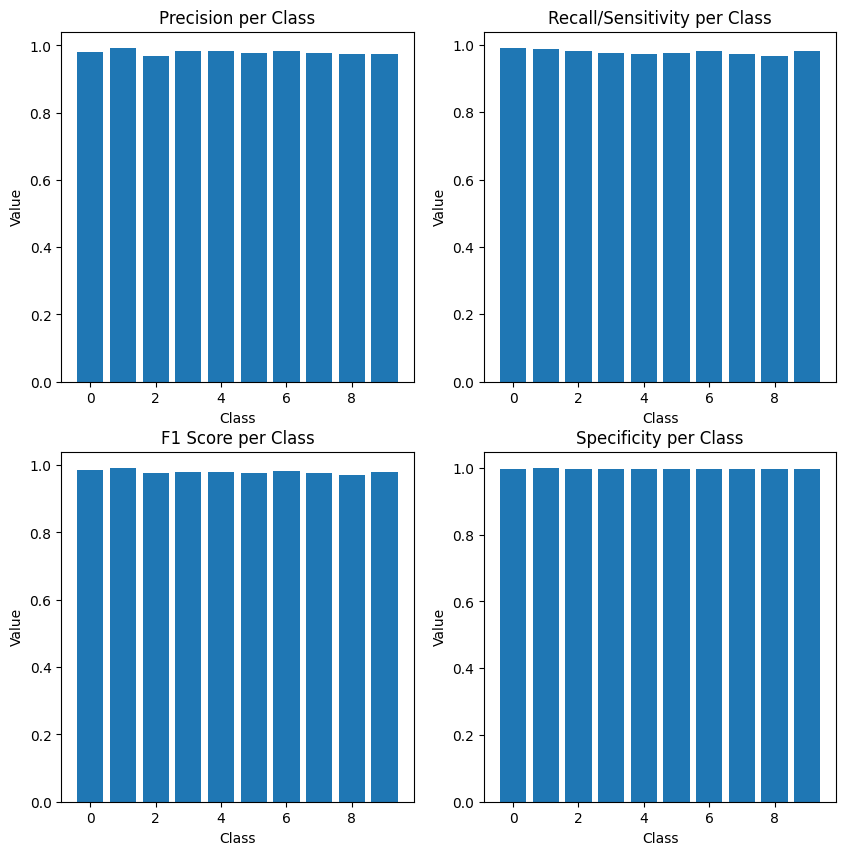

In [ ]:

# Homework Section 5: Apply a simple neural network to this dataset.

def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

def train_model(model, x_train, y_train, x_val, y_val, epochs=20, batch_size=64, model_name='best_model.keras'):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
        tf.keras.callbacks.ModelCheckpoint(filepath=model_name, save_best_only=True)
    ]

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        callbacks=callbacks)

    model.load_weights(model_name)

    return history

def evaluate_model(model, x_test, y_test):
    y_pred_proba = model.predict(x_test)
    y_pred = np.argmax(y_pred_proba, axis=1)

    cm = confusion_matrix(y_test, y_pred)

    tp = cm.diagonal()
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = cm.sum() - (fp + fn + tp)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    specificity = tn / (tn + fp)

    return cm, precision, recall, f1_score, specificity

def plot_metrics(history, precision, recall, f1_score, specificity):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs[0, 0].bar(range(10), precision)
    axs[0, 1].bar(range(10), recall)
    axs[1, 0].bar(range(10), f1_score)
    axs[1, 1].bar(range(10), specificity)

    for ax in axs.flat:
        ax.set(xlabel='Class', ylabel='Value')

    axs[0, 0].set_title('Precision per Class')
    axs[0, 1].set_title('Recall/Sensitivity per Class')
    axs[1, 0].set_title('F1 Score per Class')
    axs[1, 1].set_title('Specificity per Class')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    optimal_epoch = np.argmin(history.history['val_loss']) + 1
    plt.axvline(optimal_epoch, linestyle='--', color='r', label='Optimal Epoch')
    plt.legend()

    plt.show()

def plot_confusion_matrix(cm):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

model = build_model(input_shape=(28, 28, 1))
history = train_model(model, x_train, y_train, x_test, y_test, model_name='best_model_original.keras')
cm, precision, recall, f1_score, specificity = evaluate_model(model, x_test, y_test)
plot_metrics(history, precision, recall, f1_score, specificity)
plot_confusion_matrix(cm)

### 3. classification (using the `tensorflowlib.py)

Metrics Explanation and Confusion Matrix

2.
Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.

$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

3.
Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is also called Positive Predictive Value.

$$ \text{Precision} = \frac{TP}{TP + FP} $$

4.
Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. It is also known as Sensitivity or True Positive Rate.

$$ \text{Recall} = \frac{TP}{TP + FN} $$

5.
The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is a good way to show that a classifer has a good value for both recall and precision.

$$ \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$

6.
Specificity is the ratio of correctly predicted negative observations to the all observations in actual class - no. It is also known as True Negative Rate.

$$ \text{Specificity} = \frac{TN}{TN + FP} $$



## Optimization Suggestions
Improve Model Architecture:

Add more layers or use different types of layers (e.g., Convolutional Layers).
Experiment with different activation functions and number of neurons.
Use Batch Normalization to stabilize and speed up training.
Hyperparameter Tuning:

Experiment with different learning rates, batch sizes, and number of epochs.
Use learning rate schedules or optimizers like Adam with learning rate decay.
Data Augmentation:

Augment the training data to improve model generalization and prevent overfitting.
Early Stopping and Checkpoints:

Implement early stopping to prevent overfitting and save the best model.
Save model checkpoints during training for recovery and analysis.
Efficient Data Handling:

Use data generators for efficient loading and augmentation of large datasets.
Data Normalization and Augmentation:

Combine normalization and augmentation into a data pipeline.
Model Architecture:

Add Batch Normalization to stabilize and speed up training.
Consider using more efficient optimizers or learning rate schedules.
Training:

Add TensorBoard callback for better visualization.
Use learning rate scheduling for better convergence.


In [ ]:
# Load and preprocess the data (example with MNIST)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Build and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Reshape((28, 28, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Predictions
y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Confusion Matrix
A confusion matrix is a table used to evaluate the performance of a classification model. It shows the actual versus predicted classifications.

- **True Positives (TP)**: Correctly predicted positive observations
- **True Negatives (TN)**: Correctly predicted negative observations
- **False Positives (FP)**: Incorrectly predicted as positive
- **False Negatives (FN)**: Incorrectly predicted as negative

The matrix typically looks like this:

|                    | Predicted Positive | Predicted Negative |
|--------------------|--------------------|--------------------|
| **Actual Positive** | TP                 | FN                 |
| **Actual Negative** | FP                 | TN                 |


### Detailed Analysis of the Confusion Matrix

- **High Accuracy for Most Digits:** The model performs exceptionally well for digits like 0, 1, and 7, as indicated by the high values along the diagonal for these classes. This suggests that the model effectively recognizes the distinct features of these digits.

- **Confusions Noted:**
  - **Digit 2:** Shows notable confusion with digit 8 (25 instances) and digit 3 (14 instances), suggesting that the model sometimes struggles to differentiate between the loop and curve features of these digits.
  - **Digit 3:** Frequently confused with digit 5 (24 instances) and digit 8 (20 instances), indicating a challenge with similarly curved structures.
  - **Digit 4:** Has significant misclassifications with digit 9 (31 instances), possibly due to the overlap in parts of their shapes.
  - **Digit 5:** Shows considerable confusion with digit 3 (32 instances) and digit 8 (24 instances), reflecting difficulties in distinguishing among digits with rounded elements.
  - **Digit 8 and 9:** Both these digits see some confusion with digits 3 and 4, respectively, which may be due to their shared structural features in some writing styles.

*Strengths*

- The model shows robustness in identifying simple and more distinct shapes, such as digits 0, 1, and 7, which typically have unique silhouettes that are less likely to be confused with other digits.

*Weaknesses*

- Digits that share structural similarities (e.g., rounded tops, loops) like 3, 5, 8, and 9 are more prone to being misclassified. This is evident from the higher off-diagonal values in these rows and columns of the confusion matrix.

*Recommendations for Improvement*

- **Enhanced Feature Engineering:** Implementing more sophisticated image preprocessing techniques to accentuate unique features of each digit might help reduce confusion.

- **Model Architecture Tuning:** Adjusting the neural network architecture, possibly by adding convolutional layers, could help in better feature extraction, especially for digits with similar structures.
- **Data Augmentation:** Using techniques such as rotation, scaling, and adding noise may help the model learn to recognize digits under various transformations, thus improving its robustness.

## 6. Describe the confusion matrix of the above classification. What conclusions can be drawn from this matrix?

Diagonal Values:

The diagonal values represent the number of correct predictions for each class.
For example, the value 971 in the top-left corner indicates that the digit '0' was correctly classified 971 times.
Off-Diagonal Values:

Off-diagonal values represent misclassifications.
For example, the value 10 in the row for the true label '7' and column for the predicted label '2' indicates that the digit '7' was incorrectly classified as '2' 10 times.
Detailed Observations

###Class '0':
True Positives (Correctly Classified): 971
Misclassifications: 3 as '2', 5 as '8', and 1 as '6'
Conclusion: The model performs very well on classifying '0', with very few misclassifications.

###Class '1':

True Positives: 1124
Misclassifications: 1 as '2', 3 as '3', 1 as '4', and 4 as '8'
Conclusion: The model performs exceptionally well on classifying '1', with minimal misclassifications.

###Class '2':
True Positives: 1023
Misclassifications: 1 as '1', 3 as '3', 3 as '5', and 2 as '8'
Conclusion: The model performs well on classifying '2', but has a small number of misclassifications.

###Class '3':
True Positives: 1007
Misclassifications: 2 as '2', 1 as '5', and 1 as '8'
Conclusion: The model performs well on classifying '3', with very few misclassifications.

###Class '4':
True Positives: 966
Misclassifications: 1 as '0', 1 as '5', 2 as '6', and 6 as '9'
Conclusion: The model performs well on classifying '4', but there are a few more misclassifications compared to other classes.

###Class '5':
True Positives: 878
Misclassifications: 1 as '3', 7 as '4', 5 as '6'
Conclusion: The model performs slightly worse on classifying '5' compared to other digits, with more misclassifications.

###Class '6':
True Positives: 950
Misclassifications: 1 as '1', 2 as '3', 3 as '5', 2 as '7'
Conclusion: The model performs well on classifying '6', but there are some misclassifications.

###Class '7':
True Positives: 1012
Misclassifications: 1 as '2', 10 as '3'
Conclusion: The model performs very well on classifying '7', with a notable number of misclassifications as '3'.

###Class '8':
True Positives: 962
Misclassifications: 1 as '0', 3 as '2', 1 as '4', 2 as '5', and 3 as '9'
Conclusion: The model performs well on classifying '8', but there are some misclassifications across various other digits.

###Class '9':
True Positives: 987
Misclassifications: 2 as '0', 1 as '3', 4 as '4', 3 as '5', and 5 as '8'
Conclusion: The model performs very well on classifying '9', but there are a few more misclassifications compared to other digits.

##Conclusions

###Overall Performance:

The model shows high accuracy in classifying the digits, as indicated by the high values along the diagonal.
Most misclassifications occur among digits with similar shapes, such as '4' and '9', or '7' and '2'.

###Class-Specific Insights:
The model performs exceptionally well on classes '1' and '0' with very few misclassifications.
Classes '5' and '8' have relatively more misclassifications, indicating that the model might be confusing these digits with others more often.
The most common misclassification seems to be between digits '7' and '2', and '9' and '4', possibly due to their similar shapes in certain handwriting styles.

###Potential Improvements:
Data Augmentation: Further augmenting the training data to include more variations of the misclassified digits might help.
Model Complexity: Increasing the model's complexity by adding more layers or using more advanced architectures like residual networks (ResNets) could improve performance.
Hyperparameter Tuning: Experimenting with different learning rates, batch sizes, and epochs might yield better results.
By analyzing the confusion matrix, you can identify which digits are being confused with each other and take targeted actions to improve the model's performance.

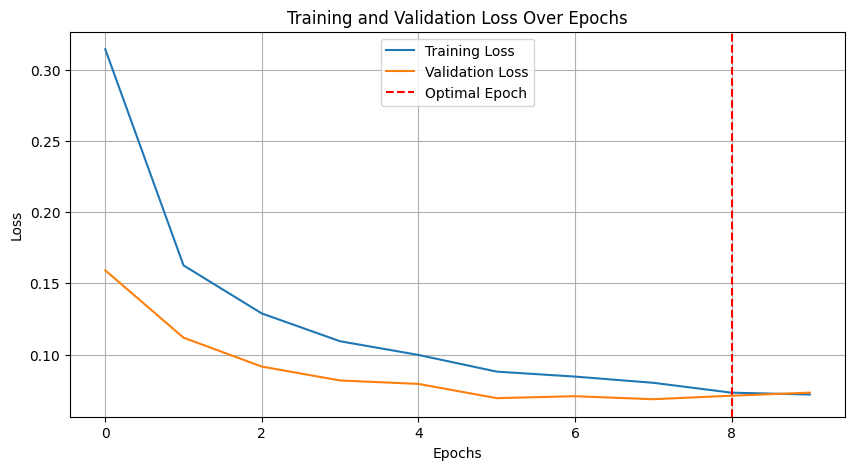

In [ ]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Annotate the plot to show the optimal number of epochs
optimal_epoch = np.argmin(history.history['val_loss']) + 1
plt.axvline(optimal_epoch, linestyle='--', color='r', label='Optimal Epoch')
plt.legend()

plt.show()


- **Optimal Epochs**: The optimal number of epochs, based on this graph, appears to be around **8 epochs**. At this point, the validation loss has minimized and stabilized, suggesting that the model has learned effectively without overfitting

In [ ]:
# Load MNIST dataset
(x_train_avg, y_train_avg), (x_test_avg, y_test_avg) = mnist.load_data()

# Function to apply mean filtering
def apply_mean_filter(images):
    return np.array([uniform_filter(img, size=3) for img in images])

# Apply mean filter to the training and testing images
x_train_filtered = apply_mean_filter(x_train_avg)
x_test_filtered = apply_mean_filter(x_test_avg)


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3145 - accuracy: 0.9080 - val_loss: 0.1592 - val_accuracy: 0.9518
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1626 - accuracy: 0.9517 - val_loss: 0.1118 - val_accuracy: 0.9655
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1289 - accuracy: 0.9602 - val_loss: 0.0916 - val_accuracy: 0.9715
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1093 - accuracy: 0.9667 - val_loss: 0.0818 - val_accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0997 - accuracy: 0.9695 - val_loss: 0.0794 - val_accuracy: 0.9738
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0880 - accuracy: 0.9725 - val_loss: 0.0694 - val_accuracy: 0.9784
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0845 - accuracy: 0.9740 - val_loss: 0.0707 - val_accura

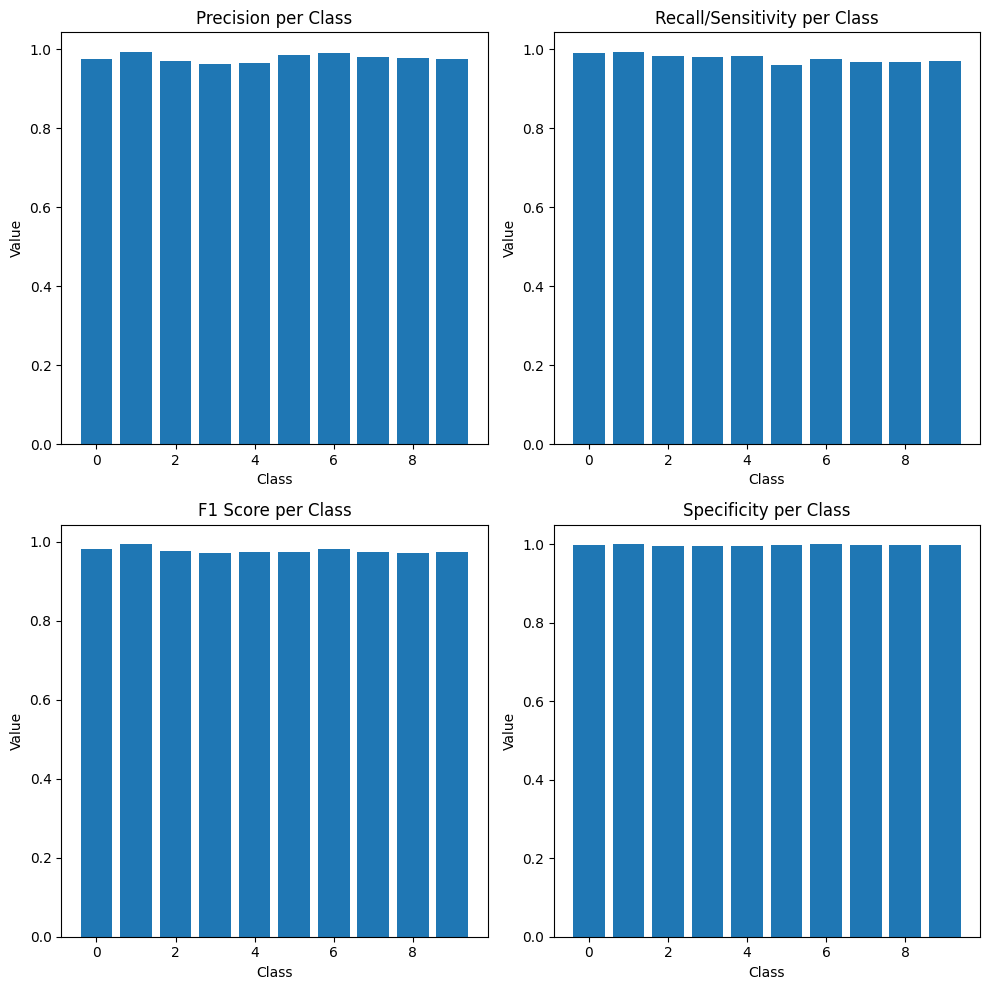

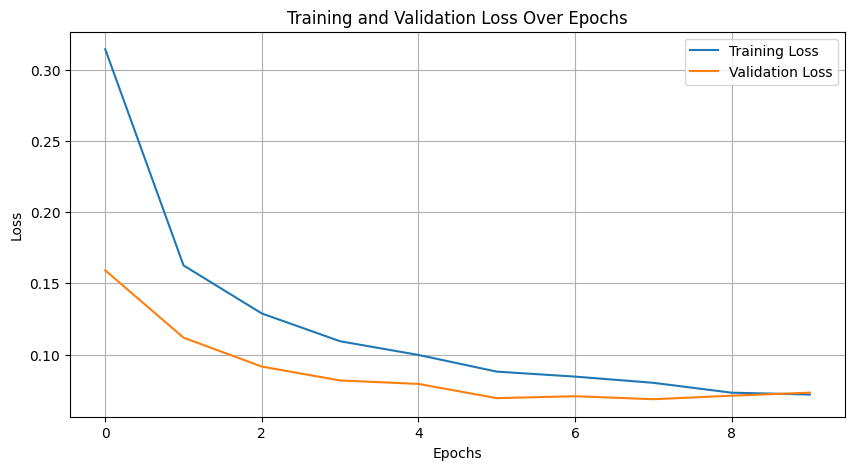

In [ ]:
# Normalize the filtered data
x_train_filtered, x_test_filtered = x_train_filtered / 255.0, x_test_filtered / 255.0
# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the filtered data
history = model.fit(x_train_filtered, y_train, epochs=10, validation_data=(x_test_filtered, y_test))
# Predictions for the test data
y_pred_proba = model.predict(x_test_filtered)
y_pred = np.argmax(y_pred_proba, axis=1)

# Compute the confusion matrix and other metrics
cm = confusion_matrix(y_test, y_pred)
tp = cm.diagonal()
fp = cm.sum(axis=0) - tp
fn = cm.sum(axis=1) - tp
tn = cm.sum() - (fp + fn + tp)

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
specificity = tn / (tn + fp)

# Plot the metrics
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].bar(range(10), precision)
axs[0, 1].bar(range(10), recall)
axs[1, 0].bar(range(10), f1_score)
axs[1, 1].bar(range(10), specificity)
for ax in axs.flat:
    ax.set(xlabel='Class', ylabel='Value')
axs[0, 0].set_title('Precision per Class')
axs[0, 1].set_title('Recall/Sensitivity per Class')
axs[1, 0].set_title('F1 Score per Class')
axs[1, 1].set_title('Specificity per Class')
plt.tight_layout()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


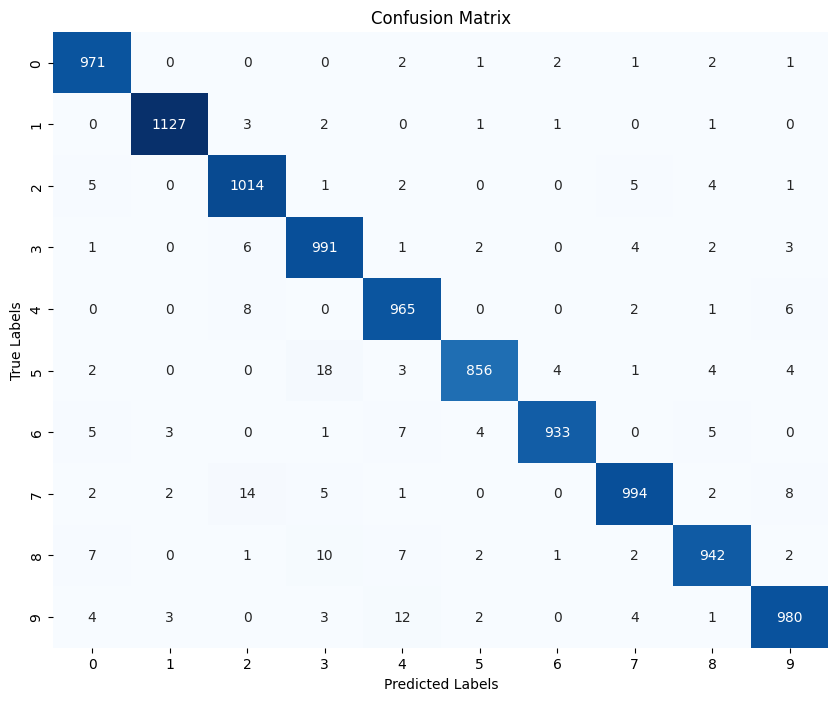

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
